## Feature Selection
- Fewer Features = Better
- Remove low-variance (<p) features
- e.g. Our class are all below 10 ft tall
- We don't care, it doesn't tell us anything
- If your feature has an effect on your outcome you call the feature a predictor
- If it doesn't affect your outcome you just call them feature
- Our goal is to remove features that are not predictors
- The more feature = harder

### Categorical (Classification) vs Numerical (Regression)
- with Numerical, you can measure exactly the ranges, etc. between two variables
- with Category, you group things into categories so saying that grade A is better than F is correct
- however, you won't be able to answer the question of how much better...

#### Numerical only consists of:
- Continuous: Floating point numbers
- Discrete: Exact numbers, nothing below 0
- A good example would be your age, it can be discrete numbers if you round it up
- But.. It can also be continuous if you count the decimal places that represent the months, or even the days..

#### Categorical are made of 3 types:
- Interval: Meaning, that they can be easily ordered/sorted, and are equally spaced intervals e.g. Age Group
- Ordinal: It can be ordered, but doesn't mean that they're equally spaced
    - Income is a great example for ordinal
    - You could have a high level income, middle, or low
    - But you don't know how high, because the richer could just keep getting richer
    - Undefined spacing because they are relative terms it's all up to you
- Nominal: Meaning it can't be ordered at all, an example would be gender or marital status
    - We can't say wether males are better than females or whether females are better than male
    - They're uncomparable

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [3]:
from sklearn.feature_selection import VarianceThreshold
p = 0.8 # max allowed fraction of ones
sel = VarianceThreshold(threshold=(p * (1 - p))) # Variance

In [4]:
sel

VarianceThreshold(threshold=0.15999999999999998)

In [5]:
RandBi = np.random.binomial(1, 0.95, 10**4) #95% chance of getting 1 = 95%
RandBi

array([1, 1, 1, ..., 1, 1, 1])

In [6]:
RandBi_Normal = np.random.binomial(1, 0.5, 10**4) #BALANCED 50/50
RandBi_Normal

array([0, 1, 1, ..., 0, 0, 0])

In [34]:
DF = pd.DataFrame({"bad": RandBi, "good": RandBi_Normal})
DF

,bad,good
0,1,0
1,1,1
2,1,1
3,1,0
4,1,0
5,1,1
6,1,0
7,1,0
8,1,0
9,1,0


In [8]:
DF.mean() #Which is the probability

bad     0.9523
good    0.5002
dtype: float64

In [9]:
newDF = sel.fit_transform(DF)
newDF 

array([[0],
       [1],
       [1],
       ...,
       [0],
       [0],
       [0]])

In [10]:
sel.get_support()

array([False,  True])

### What if... They're both normal? Will it select both? Let's find out!

In [11]:
DF = pd.DataFrame({"good1": RandBi_Normal, "good2": RandBi_Normal})
DF

,good1,good2
0,0,0
1,1,1
2,1,1
3,0,0
4,0,0
5,1,1
6,0,0
7,0,0
8,0,0
9,0,0


In [12]:
newDF_bothGood = sel.fit_transform(DF)
newDF_bothGood

array([[0, 0],
       [1, 1],
       [1, 1],
       ...,
       [0, 0],
       [0, 0],
       [0, 0]])

In [13]:
sel.get_support()

array([ True,  True])

In [36]:
DF = pd.DataFrame({"bad": RandBi, "good": RandBi_Normal})
DF

,bad,good
0,1,0
1,1,1
2,1,1
3,1,0
4,1,0
5,1,1
6,1,0
7,1,0
8,1,0
9,1,0


In [15]:
newDF = sel.fit_transform(DF)
newDF 

array([[0],
       [1],
       [1],
       ...,
       [0],
       [0],
       [0]])

In [16]:
DF1 = pd.DataFrame(newDF)
DF1.columns = ["good"]
DF1

,good
0,0
1,1
2,1
3,0
4,0
5,1
6,0
7,0
8,0
9,0


### Univariate feature selection
* keeps k high-scoring features; chi-square test
* Looking at both input and output, whereas the first one only looked at the output

In [17]:
from sklearn.feature_selection import SelectKBest, chi2
sel = SelectKBest(chi2, k=1) #SelectKBest finds out whether the columns are somehow related to the output

In [18]:
chi2

<function sklearn.feature_selection.univariate_selection.chi2(X, y)>

In [19]:
DF2 = DF1['good']+(0.01*np.random.normal(0, 1, 10**4)) #0 mean, 1 stdev
DF2

0      -0.006021
1       0.999375
2       0.994828
3       0.000031
4      -0.003792
5       1.001872
6       0.012566
7       0.002439
8       0.004467
9       0.008506
10      1.001030
11      1.005894
12      1.019939
13     -0.008095
14      0.998705
15     -0.015464
16      0.009233
17      1.011035
18      0.985086
19      0.008459
20      0.992369
21     -0.003478
22     -0.008226
23      0.991741
24      0.999575
25      1.010541
26      1.021255
27     -0.015543
28      0.999021
29      0.992336
          ...   
9970   -0.012628
9971    1.004253
9972    1.002915
9973    0.003518
9974    0.002360
9975    0.994833
9976    1.007984
9977    1.005082
9978    0.989507
9979    0.015354
9980    1.004094
9981    1.004619
9982    0.006822
9983   -0.001695
9984   -0.014767
9985    0.000233
9986    1.002993
9987    1.012798
9988    0.998556
9989    0.011084
9990    0.987275
9991    1.010561
9992   -0.015281
9993    0.984926
9994    1.001452
9995   -0.016032
9996    0.011953
9997    0.0256

In [20]:
sel.fit_transform(DF1, DF2)

ValueError: Unknown label type: (array([-0.00602149,  0.99937527,  0.99482808, ...,  0.02563662,
       -0.00853733,  0.00186687]),)

In [ ]:
DF2 = 1 - DF1['good'] # NOW we definitely know that the input and output is related

In [ ]:
sel.fit_transform(DF1, DF2)

### Now we'll look at Feature Scaling
* You want all your features to be on the same scale, same as if you are studying physics
* You want all your scalar units to be the same, otherwise the numbers become relative and meaningless
* Clustering: identifying a dense groups of data in a high dimensional space
* Which keeps all features on the same scale which could be useful for clustering
* Method 1: Mean Removal; subtract the mean and divide by the standard deviation
    * (X-μ)/σ
    * Which is the outline of normalizing a data
    * If your data is a normalized data, scaling it will create a normalized normal distribution
    * If your data is not normalized, scaling it will give μ=0, σ=1 but graphing it will still look the same
    *It's really about scaling up or down
    * All items in your data set becomes comparable this way
* Method 2: Scale to Range; select a range and subtract with the min and divide with max-min
* Method 3: Binarization; converting to True/False (grouping)

In [37]:
DF

,bad,good
0,1,0
1,1,1
2,1,1
3,1,0
4,1,0
5,1,1
6,1,0
7,1,0
8,1,0
9,1,0


In [38]:
from sklearn import preprocessing

#### Method 1

In [40]:
X_scaled = pd.DataFrame(preprocessing.scale(DF), columns=DF.columns) #must pass columns
X_scaled

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int64 were all converted to float64 by the scale function.
  """Entry point for launching an IPython kernel.


,bad,good
0,0.223806,-1.0004
1,0.223806,0.9996
2,0.223806,0.9996
3,0.223806,-1.0004
4,0.223806,-1.0004
5,0.223806,0.9996
6,0.223806,-1.0004
7,0.223806,-1.0004
8,0.223806,-1.0004
9,0.223806,-1.0004


In [43]:
print("Mean:", X_scaled.mean(),"Std.:", X_scaled.std(),sep="\n")

Mean:
bad    -5.928924e-16
good    4.429346e-16
dtype: float64
Std.:
bad     1.00005
good    1.00005
dtype: float64


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fce84182048>,
      dtype=object)

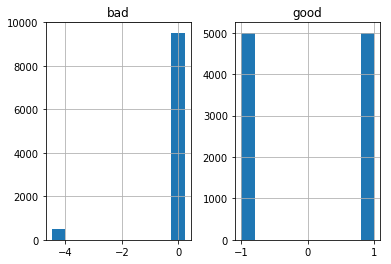

In [44]:
X_scaled.hist()

#### Method 2

In [47]:
mms = preprocessing.MinMaxScaler() #Create min_max_scaler
X_scaled_mms = pd.DataFrame(mms.fit_transform(DF), columns=DF.columns)
X_scaled_mms

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


,bad,good
0,1.0,0.0
1,1.0,1.0
2,1.0,1.0
3,1.0,0.0
4,1.0,0.0
5,1.0,1.0
6,1.0,0.0
7,1.0,0.0
8,1.0,0.0
9,1.0,0.0


In [48]:
X_scaled_mms - DF

,bad,good
0,0.0,0.0
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0
5,0.0,0.0
6,0.0,0.0
7,0.0,0.0
8,0.0,0.0
9,0.0,0.0


In [52]:
(X_scaled_mms-DF).sum()

bad     0.0
good    0.0
dtype: float64

In [64]:
(DF - mms.fit_transform(X_scaled)).astype("int64").sum()

bad     0
good    0
dtype: int64

In [61]:
pd.DataFrame(mms.fit_transform(X_scaled), columns=DF.columns).astype("int32")

,bad,good
0,0,0
1,0,1
2,0,1
3,0,0
4,0,0
5,0,1
6,0,0
7,0,0
8,0,0
9,0,0


#### Method 3

###### Make data Binary
* 0 and 1 only

In [27]:
binarizer = preprocessing.Binarizer(threshold=0.0)
X_bin = binarizer.transform(DF1)

In [28]:
X_bin

array([[0],
       [1],
       [1],
       ...,
       [0],
       [0],
       [0]])

### Splitting Data
* You don't want your model/e.g. student to remember things for the exam
* You want the model to be able to solve problems during the exam, with methods
* You need to split your dataset into training and testing
* This method pseudo-randomly splits data into two sets: training and testing
* This puts the testing data aside until the model has been trained. Otherwise it may cause overfitting
* _Overfiting_ is a modeling error when the model is too closely fit to the training set of data points
* As if it has just copied the training model and not predicted it

In [66]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(DF1, DF2, test_size=0.30, random_state=42)
#random_state is like the random seed, if you apply that then it will be ordered in that matter always
#For debugging purposes this may be required, but defintely not for practical uses

In [32]:
X_train.count()

good    7000
dtype: int64

In [33]:
X_test.count()

good    3000
dtype: int64

## Supervised Models

* There are large classes, supervised meaning you know input and some output
* Unsupervised means that you only know the input
* With supervised models you have the expected output
* This means that you can find out the quality of your model
* Bad results could mean...
    * GO back and re train your model
    * Or.. GO back and select different features in your model
        * Scale it differently
        * Or.. Pick a different feature
    * Or... Go further back and add some different features to your data